In [ ]:
# Author : Amir Shokri
# github link : https://github.com/amirshnll/COVID-19-Surveillance
# dataset link : http://archive.ics.uci.edu/ml/datasets/COVID-19+Surveillance
# email : amirsh.nll@gmail.com

### <p style=color:blue>k-nearest neighbors for Divorce Predictors Data Set</p>


#### The Dataset
The Dataset is from UCIMachinelearning and it provides you all the relevant information needed for the prediction of Divorce. It contains 54 features and on the basis of these features we have to predict that the couple has been divorced or not. Value 1 represent Divorced and value 0 represent not divorced. Features are as follows:
1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence.

Generally, logistic Machine Learning in Python has a straightforward and user-friendly implementation. It usually consists of these steps:<br>
1. Import packages, functions, and classes<br>
2. Get data to work with and, if appropriate, transform it<br>
3. Create a classification model and train (or fit) it with existing data<br>
4. Evaluate your model to see if its performance is satisfactory<br>
5. Apply your model to make predictions<br>

#### Import packages, functions, and classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score 
from sklearn import tree

#### Get data to work with and, if appropriate, transform it

In [2]:
df = pd.read_csv('divorce.csv',sep=';')
y=df.Class
x_data=df.drop(columns=['Class'])
df.head(10)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
5,0,0,1,0,0,2,0,0,0,1,...,2,2,1,2,1,1,1,2,0,1
6,3,3,3,2,1,3,4,3,2,2,...,3,2,3,2,3,3,2,2,2,1
7,2,1,2,2,2,1,0,3,3,2,...,0,1,2,2,2,1,1,1,0,1
8,2,2,1,0,0,4,1,3,3,3,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,2,0,2,2,2,...,2,0,2,2,2,2,4,3,3,1


#### Data description

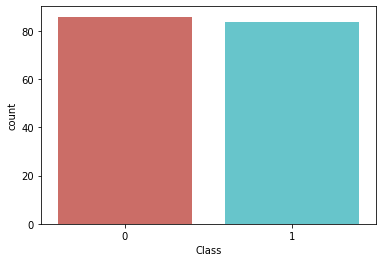

percentage of no divorce is 50.588235294117645
percentage of divorce 49.411764705882355


In [3]:
sns.countplot(x='Class',data=df,palette='hls')
plt.show()

count_no_sub = len(df[df['Class']==0])
count_sub = len(df[df['Class']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no divorce is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of divorce", pct_of_sub*100)

#### Normalize data

In [4]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,0.50,0.5,1.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.75,0.50,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25
1,1.00,1.0,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,...,0.50,0.50,0.50,0.75,1.00,1.00,1.00,1.00,0.50,0.50
2,0.50,0.5,0.50,0.50,0.25,0.75,0.50,0.25,0.25,0.50,...,0.50,0.75,0.50,0.75,0.25,0.25,0.25,0.50,0.50,0.50
3,0.75,0.5,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.75,...,0.75,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.50,0.50
4,0.50,0.5,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,...,0.50,0.50,0.25,0.50,0.75,0.50,0.50,0.50,0.25,0.00


#### correlation of all atribute

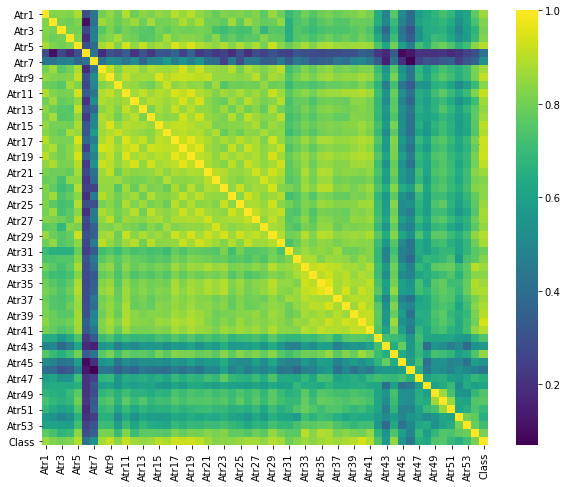

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='viridis');

#### Split data set 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5,random_state=100)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (85, 54)
x_test:  (85, 54)
y_train:  (85,)
y_test:  (85,)


#### Create a classification model and train (or fit) it with existing data

Step 1. Import the model you want to use<br>
Step 2. Make an instance of the Model<br>
Step 3. Training the model on the data, storing the information learned from the data<br>
Step 4. Predict labels for new data <br>

In [7]:
K = 5
clfk = KNeighborsClassifier(n_neighbors=K)
clfk.fit(x_train, y_train.ravel())
y_predk=clfk.predict(x_test)

print("When K = {} neighnors , KNN test accuracy: {}".format(K, clfk.score(x_test, y_test)))
print("When K = {} neighnors , KNN train accuracy: {}".format(K, clfk.score(x_train, y_train)))
print(classification_report(y_test, clfk.predict(x_test)))
print("Knn(k=5) test accuracy: ", clfk.score(x_test, y_test))

ran = np.arange(1,30)
train_list = []
test_list = []
for i,each in enumerate(ran):
    clfk = KNeighborsClassifier(n_neighbors=each)
    clfk.fit(x_train, y_train.ravel())
    test_list.append(clfk.score(x_test, y_test))
    train_list.append(clfk.score(x_train, y_train))
    

print("Best test score is {} , K = {}".format(np.max(test_list), test_list.index(np.max(test_list))+1))
print("Best train score is {} , K = {}".format(np.max(train_list), train_list.index(np.max(train_list))+1))

When K = 5 neighnors , KNN test accuracy: 0.9764705882352941
When K = 5 neighnors , KNN train accuracy: 0.9764705882352941
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.95      0.98        44

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85

Knn(k=5) test accuracy:  0.9764705882352941
Best test score is 0.9882352941176471 , K = 1
Best train score is 1.0 , K = 1


#### Report

In [8]:
print(classification_report(y_test, clfk.predict(x_test)))
print('Accuracy of k-nearest neighbors classifier on test set: {:.2f}'.format(clfk.score(x_test, y_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.95      0.98        44

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85

Accuracy of k-nearest neighbors classifier on test set: 0.98


#### Draw Figure differnt K

Best test score is 0.9882352941176471 , K = 1
Best train score is 1.0 , K = 1


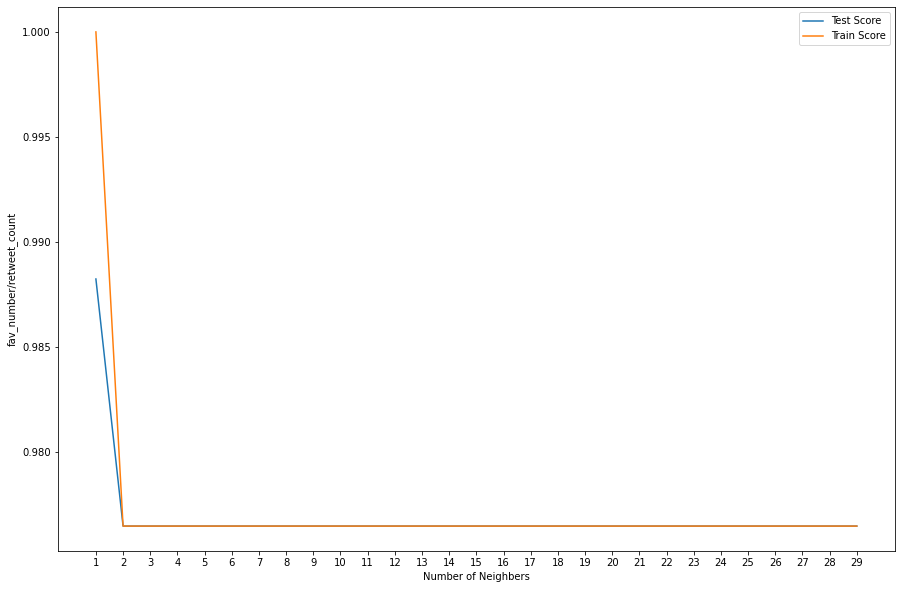

In [9]:
plt.figure(figsize=[15,10])
plt.plot(ran,test_list,label='Test Score')
plt.plot(ran,train_list,label = 'Train Score')
plt.xlabel('Number of Neighbers')
plt.ylabel('fav_number/retweet_count')
plt.xticks(ran)
plt.legend()
print("Best test score is {} , K = {}".format(np.max(test_list), test_list.index(np.max(test_list))+1))
print("Best train score is {} , K = {}".format(np.max(train_list), train_list.index(np.max(train_list))+1))

#### Confusion Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

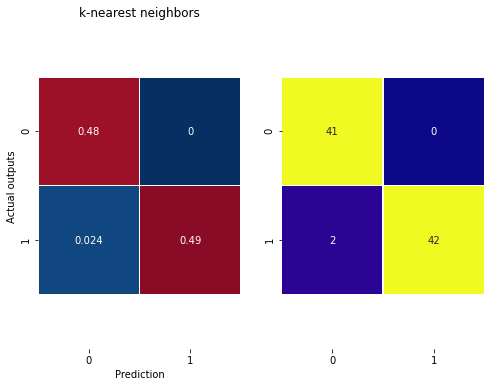

In [10]:
from sklearn.metrics import classification_report, confusion_matrix as cm
def confusionMatrix(y_pred,title,n):
    plt.subplot(1,2,n)
    ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True 
                   ,cmap='RdBu_r', vmin=0, vmax=0.52,cbar=False, linewidths=.5)
    plt.title(title)
    plt.ylabel('Actual outputs')
    plt.xlabel('Prediction')
    b, t=ax.get_ylim()
    ax.set_ylim(b+.5, t-.5)
    plt.subplot(1,2,n+1)
    axx=sns.heatmap(cm(y_test, y_pred), annot=True 
                   ,cmap='plasma', vmin=0, vmax=40,cbar=False, linewidths=.5)
    b, t=axx.get_ylim()
    axx.set_ylim(b+.5, t-.5)
    return

plt.figure(figsize=(8,6))
confusionMatrix(y_predk,'k-nearest neighbors',1)
plt.show

#### Result:
So we have successfully trained our dataset into k-nearest neighbors for predicting whether a couple will get divorced or not. And also got the accuracy & confusion matrix for k-nearest neighbors